In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px

In [5]:
df = sns.load_dataset('tips')
df.to_csv('tips.csv', index=False)

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
#Unsupervised

#Contenuous - total_bill, tip
#Category - sex,	smoker,	day,	time,	size

#corr

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [9]:
#total_bill,	tip 	   - H0 is rejected

#total_bill, sex	    - H0 is rejected
#total_bill, smoker   - H0 is accepted
#total_bill, day     - H0 is rejected
#total_bill, time	    - H0 is rejected
#total_bill, size    - H0 is rejected

#tip, sex,	          - H0 is accepted
#tip, smoker          - H0 is accepted
#tip, day            - H0 is accepted
#tip, time	          - H0 is accepted
#tip, size            - H0 is rejected

#sex, smoker          - H0 is accepted
#sex, day              - H0 is rejected
#sex, time	          - H0 is rejected
#sex, size           - H0 is accepted

#day, time	        - H0 is rejected
#day, size	         - H0 is rejected

#time, size	         - H0 is rejected

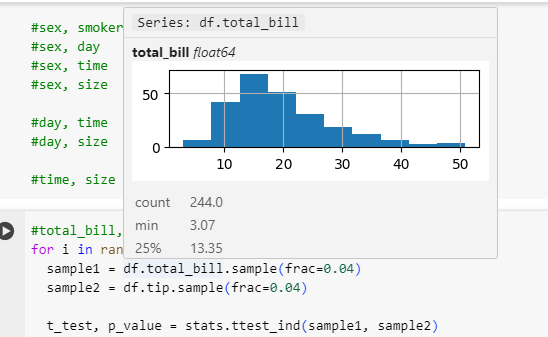

In [10]:
#total_bill,	tip
for i in range(20):
  sample1 = df.total_bill.sample(frac=0.04)
  sample2 = df.tip.sample(frac=0.04)

  t_test, p_value = stats.ttest_ind(sample1, sample2)

  if p_value > 0.5:
    print("H0 is accepted")
  else:
    print('H0 is rejected')

H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected


In [11]:
data = pd.crosstab(df["sex"], df["smoker"])
data

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [12]:
observed_values = data.values
observed_values

array([[60, 97],
       [33, 54]])

In [13]:
result = stats.chi2_contingency(observed_values)

In [14]:
result

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [15]:
#sex, smoker - H0 is accepted

data = pd.crosstab(df["sex"], df["smoker"])
observed_values = data.values
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("H0 is accepted")
else:
  print("H0 is rejected")


H0 is accepted


In [16]:
#sex, day

data = pd.crosstab(df["sex"], df["day"])
observed_values = data.values
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("H0 is accepted")
else:
  print("H0 is rejected")

H0 is rejected


In [17]:
#sex, time

data = pd.crosstab(df["sex"], df["time"])
observed_values = data.values
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("H0 is accepted")
else:
  print("H0 is rejected")

H0 is rejected


In [18]:
#sex, size

data = pd.crosstab(df["sex"], df["size"])
observed_values = data.values
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("H0 is accepted")
else:
  print("H0 is rejected")

H0 is accepted


In [19]:
#day, time

data = pd.crosstab(df["day"], df["time"])
observed_values = data.values
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("H0 is accepted")
else:
  print("H0 is rejected")

H0 is rejected


In [20]:
#day, size

data = pd.crosstab(df["day"], df["size"])
observed_values = data.values
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("H0 is accepted")
else:
  print("H0 is rejected")

H0 is rejected


In [21]:
#time, size

data = pd.crosstab(df["time"], df["size"])
observed_values = data.values
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("H0 is accepted")
else:
  print("H0 is rejected")

H0 is rejected


In [22]:
#total_bill, sex
group = df['sex'].unique()

In [23]:
data = {}
for i in group:
  data[i]=df["total_bill"][df["sex"]==i]

In [24]:
data

{'Female': 0      16.99
 4      24.59
 11     35.26
 14     14.83
 16     10.33
        ...  
 226    10.09
 229    22.12
 238    35.83
 240    27.18
 243    18.78
 Name: total_bill, Length: 87, dtype: float64,
 'Male': 1      10.34
 2      21.01
 3      23.68
 5      25.29
 6       8.77
        ...  
 236    12.60
 237    32.83
 239    29.03
 241    22.67
 242    17.82
 Name: total_bill, Length: 157, dtype: float64}

In [25]:
f_value, p_value = stats.f_oneway( data['Male'], data['Female'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

5.188345638458361 0.023611666846859697
H0 - Null hypothesis is rejected which means no relationship exists


In [26]:
group = df['smoker'].unique()
group

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [27]:
#total_bill, smoker
group = df['smoker'].unique()
data = {}
for i in group:
  data[i]=df["total_bill"][df["smoker"]==i]

f_value, p_value = stats.f_oneway( data['No'], data['Yes'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

1.791411952596261 0.18201032884302323
Ha - Null hypothesis is accepted which means relationship exists


In [28]:
group = df['day'].unique()
group

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [29]:
#total_bill, day
group = df['day'].unique()
data = {}
for i in group:
  data[i]=df["total_bill"][df["day"]==i]

f_value, p_value = stats.f_oneway(data['Thur'], data['Fri'], data['Sat'], data['Sun'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

2.7674794432863363 0.04245383328952047
H0 - Null hypothesis is rejected which means no relationship exists


In [30]:
#total_bill, time
group = df['time'].unique()
group

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [31]:
group = df['time'].unique()
data = {}
for i in group:
  data[i]=df["total_bill"][df["time"]==i]

f_value, p_value = stats.f_oneway(data['Lunch'], data['Dinner'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

8.396303207955595 0.00410462140759571
H0 - Null hypothesis is rejected which means no relationship exists


In [32]:
#total_bill, size
group = df['size'].unique()
group

array([2, 3, 4, 1, 6, 5])

In [33]:
group = df['size'].unique()
data = {}
for i in group:
  data[i]=df["total_bill"][df["size"]==i]

f_value, p_value = stats.f_oneway(data[1], data[2], data[3], data[4], data[5], data[6] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

28.09461523749822 2.434919254210166e-22
H0 - Null hypothesis is rejected which means no relationship exists


In [34]:
#tip, sex,
group = df['sex'].unique()
group

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [35]:
group = df['sex'].unique()
data = {}
for i in group:
  data[i]=df["tip"][df["sex"]==i]

f_value, p_value = stats.f_oneway(data['Male'], data['Female'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

1.9261545619320048 0.166456235034572
Ha - Null hypothesis is accepted which means relationship exists


In [36]:
#tip, smoker
group = df['smoker'].unique()
group

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [37]:
group = df['smoker'].unique()
data = {}
for i in group:
  data[i]=df["tip"][df["smoker"]==i]

f_value, p_value = stats.f_oneway(data['No'], data['Yes'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

0.008506013551529044 0.926593152224447
Ha - Null hypothesis is accepted which means relationship exists


In [38]:
#tip, day
group = df['day'].unique()
group

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [39]:
group = df['day'].unique()
data = {}
for i in group:
  data[i]=df["tip"][df["day"]==i]

f_value, p_value = stats.f_oneway(data['Thur'], data['Fri'], data['Sat'], data['Sun'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

1.6723551980998699 0.1735885553040592
Ha - Null hypothesis is accepted which means relationship exists


In [40]:
#tip, time
group = df['time'].unique()
group

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [41]:
group = df['time'].unique()
data = {}
for i in group:
  data[i]=df["tip"][df["time"]==i]

f_value, p_value = stats.f_oneway(data['Lunch'], data['Dinner'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

3.633815483631457 0.05780153475171573
Ha - Null hypothesis is accepted which means relationship exists


In [42]:
#tip, size
group = df['size'].unique()
group

array([2, 3, 4, 1, 6, 5])

In [43]:
group = df['size'].unique()
data = {}
for i in group:
  data[i]=df["tip"][df["size"]==i]

f_value, p_value = stats.f_oneway(data[1], data[2], data[3], data[4], data[5], data[6] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

15.746330672727057 2.1694633916208174e-13
H0 - Null hypothesis is rejected which means no relationship exists


In [44]:
#tip, day
fig = px.bar(df, x = 'day',
                 y = 'tip',
                 title = 'Day vs Tip'
                )
fig.show()

In [45]:
pivot_table = df.pivot_table(values='tip', index='sex', columns='day', aggfunc='count')

print(pivot_table)

day     Thur  Fri  Sat  Sun
sex                        
Male      30   10   59   58
Female    32    9   28   18
